In [85]:
import geopandas as gpd
import numpy as np
import seaborn as sns
from shapely.geometry import Point, Polygon, LineString
from matplotlib import pyplot as plt
from datetime import datetime

df = gpd.read_file("res.shp", encoding="utf-8")
df["geometry"].to_crs("EPSG:5179")

0         POLYGON ((935035.000 1966905.000, 935125.000 1...
1         POLYGON ((935035.000 1966815.000, 935125.000 1...
2         POLYGON ((935035.000 1966725.000, 935125.000 1...
3         POLYGON ((935035.000 1966635.000, 935125.000 1...
4         POLYGON ((935035.000 1966545.000, 935125.000 1...
                                ...                        
138839    POLYGON ((972025.000 1937025.000, 972115.000 1...
138840    POLYGON ((972025.000 1936935.000, 972115.000 1...
138841    POLYGON ((972025.000 1936845.000, 972115.000 1...
138842    POLYGON ((972025.000 1936755.000, 972115.000 1...
138843    POLYGON ((972025.000 1936665.000, 972115.000 1...
Name: geometry, Length: 138844, dtype: geometry

In [49]:
df

,date,rainfall_m,wsm_mean,wsa_mean,wd_mean,rainfall_1,wsm_max,wsa_max,wd_max,city_name,elevation,rain_pump,lake,fl_year,geometry
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,0.0,0,None,"POLYGON ((935035.000 1966905.000, 935125.000 1..."
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,0.0,0,None,"POLYGON ((935035.000 1966815.000, 935125.000 1..."
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,0.0,0,None,"POLYGON ((935035.000 1966725.000, 935125.000 1..."
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,0.0,0,None,"POLYGON ((935035.000 1966635.000, 935125.000 1..."
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,0.0,0,None,"POLYGON ((935035.000 1966545.000, 935125.000 1..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138839,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,0.0,0,None,"POLYGON ((972025.000 1937025.000, 972115.000 1..."
138840,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,0.0,0,None,"POLYGON ((972025.000 1936935.000, 972115.000 1..."
138841,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,0.0,0,None,"POLYGON ((972025.000 1936845.000, 972115.000 1..."
138842,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,0.0,0,None,"POLYGON ((972025.000 1936755.000, 972115.000 1..."


In [50]:
df.shape

(138844, 15)

In [51]:
df.info

<bound method DataFrame.info of         date  rainfall_m  wsm_mean  wsa_mean  wd_mean  rainfall_1  wsm_max  \
0        NaN         NaN       NaN       NaN      NaN         NaN      NaN   
1        NaN         NaN       NaN       NaN      NaN         NaN      NaN   
2        NaN         NaN       NaN       NaN      NaN         NaN      NaN   
3        NaN         NaN       NaN       NaN      NaN         NaN      NaN   
4        NaN         NaN       NaN       NaN      NaN         NaN      NaN   
...      ...         ...       ...       ...      ...         ...      ...   
138839   NaN         NaN       NaN       NaN      NaN         NaN      NaN   
138840   NaN         NaN       NaN       NaN      NaN         NaN      NaN   
138841   NaN         NaN       NaN       NaN      NaN         NaN      NaN   
138842   NaN         NaN       NaN       NaN      NaN         NaN      NaN   
138843   NaN         NaN       NaN       NaN      NaN         NaN      NaN   

        wsa_max  wd_max city_na

In [52]:
df['fl_year'].unique()

array([None, '2010', '2013', '2012', '2011', '2014', '2019'], dtype=object)

In [54]:
df['fl_year'] = df['fl_year'].fillna('0')
df['fl_year'].unique()

array(['0', '2010', '2013', '2012', '2011', '2014', '2019'], dtype=object)

In [66]:
df['date'].unique()

array(['2012', '2014', '2019', '2013', '2010', '2011'], dtype=object)

In [55]:
df.isnull().sum()

date          62871
rainfall_m    62871
wsm_mean      62871
wsa_mean      62871
wd_mean       62871
rainfall_1    62871
wsm_max       62871
wsa_max       62871
wd_max        62871
city_name     62871
elevation     54189
rain_pump         0
lake              0
fl_year           0
geometry          0
dtype: int64

In [56]:
df['elevation'].unique()

array([        nan,  7.5       ,  8.        , ..., 24.91666667,
       45.3       , 34.08333333])

In [58]:
data = df # 백업
df = df.dropna() #결측치 제거

df

,date,rainfall_m,wsm_mean,wsa_mean,wd_mean,rainfall_1,wsm_max,wsa_max,wd_max,city_name,elevation,rain_pump,lake,fl_year,geometry
176,2012.0,8.630435,7.059783,1.932609,194.254348,112.0,20.8,7.0,337.5,강서구,7.500000,0.0,0,0,"POLYGON ((935035.000 1951065.000, 935125.000 1..."
177,2012.0,8.630435,7.059783,1.932609,194.254348,112.0,20.8,7.0,337.5,강서구,6.333333,0.0,0,0,"POLYGON ((935035.000 1950975.000, 935125.000 1..."
178,2012.0,8.630435,7.059783,1.932609,194.254348,112.0,20.8,7.0,337.5,강서구,6.500000,0.0,0,0,"POLYGON ((935035.000 1950885.000, 935125.000 1..."
512,2012.0,8.630435,7.059783,1.932609,194.254348,112.0,20.8,7.0,337.5,강서구,6.666667,0.0,0,0,"POLYGON ((935125.000 1951155.000, 935215.000 1..."
513,2012.0,8.630435,7.059783,1.932609,194.254348,112.0,20.8,7.0,337.5,강서구,5.500000,0.0,0,0,"POLYGON ((935125.000 1951065.000, 935215.000 1..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138360,2013.0,10.891304,7.034783,1.400000,189.761957,177.0,16.5,3.1,357.2,강동구,37.000000,0.0,1,0,"POLYGON ((971935.000 1949805.000, 972025.000 1..."
138361,2013.0,10.891304,7.034783,1.400000,189.761957,177.0,16.5,3.1,357.2,강동구,40.500000,0.0,1,0,"POLYGON ((971935.000 1949715.000, 972025.000 1..."
138362,2013.0,10.891304,7.034783,1.400000,189.761957,177.0,16.5,3.1,357.2,강동구,40.000000,0.0,1,0,"POLYGON ((971935.000 1949625.000, 972025.000 1..."
138698,2013.0,10.891304,7.034783,1.400000,189.761957,177.0,16.5,3.1,357.2,강동구,38.250000,0.0,1,0,"POLYGON ((972025.000 1949715.000, 972115.000 1..."


<AxesSubplot:>

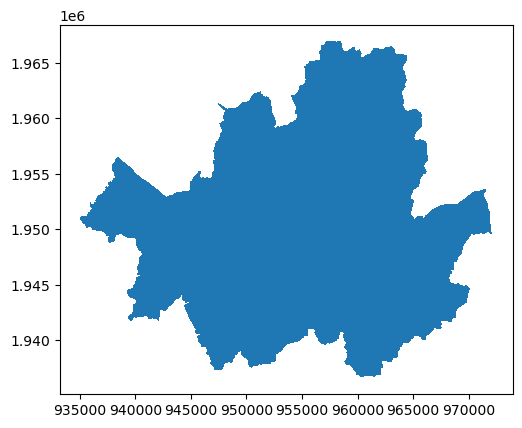

In [59]:
df.plot()

In [61]:
df2 = df # 백업

In [63]:
# 날짜 변환
df2['date'] = df2['date'].astype(int)
df2['date'] = df2['date'].astype(str)
df2
ex = df2

In [64]:
ex['date'].apply(lambda _ : datetime.strptime(_,'%Y'))
ex

,date,rainfall_m,wsm_mean,wsa_mean,wd_mean,rainfall_1,wsm_max,wsa_max,wd_max,city_name,elevation,rain_pump,lake,fl_year,geometry
176,2012,8.630435,7.059783,1.932609,194.254348,112.0,20.8,7.0,337.5,강서구,7.500000,0.0,0,0,"POLYGON ((935035.000 1951065.000, 935125.000 1..."
177,2012,8.630435,7.059783,1.932609,194.254348,112.0,20.8,7.0,337.5,강서구,6.333333,0.0,0,0,"POLYGON ((935035.000 1950975.000, 935125.000 1..."
178,2012,8.630435,7.059783,1.932609,194.254348,112.0,20.8,7.0,337.5,강서구,6.500000,0.0,0,0,"POLYGON ((935035.000 1950885.000, 935125.000 1..."
512,2012,8.630435,7.059783,1.932609,194.254348,112.0,20.8,7.0,337.5,강서구,6.666667,0.0,0,0,"POLYGON ((935125.000 1951155.000, 935215.000 1..."
513,2012,8.630435,7.059783,1.932609,194.254348,112.0,20.8,7.0,337.5,강서구,5.500000,0.0,0,0,"POLYGON ((935125.000 1951065.000, 935215.000 1..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138360,2013,10.891304,7.034783,1.400000,189.761957,177.0,16.5,3.1,357.2,강동구,37.000000,0.0,1,0,"POLYGON ((971935.000 1949805.000, 972025.000 1..."
138361,2013,10.891304,7.034783,1.400000,189.761957,177.0,16.5,3.1,357.2,강동구,40.500000,0.0,1,0,"POLYGON ((971935.000 1949715.000, 972025.000 1..."
138362,2013,10.891304,7.034783,1.400000,189.761957,177.0,16.5,3.1,357.2,강동구,40.000000,0.0,1,0,"POLYGON ((971935.000 1949625.000, 972025.000 1..."
138698,2013,10.891304,7.034783,1.400000,189.761957,177.0,16.5,3.1,357.2,강동구,38.250000,0.0,1,0,"POLYGON ((972025.000 1949715.000, 972115.000 1..."


In [73]:
ex['fl_year'].value_counts()

0       68979
2010     4266
2011     2425
2012      221
2013       58
2014       20
2019        4
Name: fl_year, dtype: int64

In [74]:
ex['date'].value_counts()

2019    18075
2012    15425
2014    14711
2013    11891
2011     8509
2010     7362
Name: date, dtype: int64

In [75]:
exx = ex.reset_index(drop=True)

for i in range(len(exx)):
    if exx['date'][i] == exx['fl_year'][i]:
        exx['fl_year'][i] = 1
    else: exx['fl_year'][i] = 0
        
exx

/var/folders/kk/gz0w5z5x38sd0qkdjkqmn82r0000gn/T/ipykernel_37856/3189248949.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  else: exx['fl_year'][i] = 0
/var/folders/kk/gz0w5z5x38sd0qkdjkqmn82r0000gn/T/ipykernel_37856/3189248949.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exx['fl_year'][i] = 1


,date,rainfall_m,wsm_mean,wsa_mean,wd_mean,rainfall_1,wsm_max,wsa_max,wd_max,city_name,elevation,rain_pump,lake,fl_year,geometry
0,2012,8.630435,7.059783,1.932609,194.254348,112.0,20.8,7.0,337.5,강서구,7.500000,0.0,0,0,"POLYGON ((935035.000 1951065.000, 935125.000 1..."
1,2012,8.630435,7.059783,1.932609,194.254348,112.0,20.8,7.0,337.5,강서구,6.333333,0.0,0,0,"POLYGON ((935035.000 1950975.000, 935125.000 1..."
2,2012,8.630435,7.059783,1.932609,194.254348,112.0,20.8,7.0,337.5,강서구,6.500000,0.0,0,0,"POLYGON ((935035.000 1950885.000, 935125.000 1..."
3,2012,8.630435,7.059783,1.932609,194.254348,112.0,20.8,7.0,337.5,강서구,6.666667,0.0,0,0,"POLYGON ((935125.000 1951155.000, 935215.000 1..."
4,2012,8.630435,7.059783,1.932609,194.254348,112.0,20.8,7.0,337.5,강서구,5.500000,0.0,0,0,"POLYGON ((935125.000 1951065.000, 935215.000 1..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75968,2013,10.891304,7.034783,1.400000,189.761957,177.0,16.5,3.1,357.2,강동구,37.000000,0.0,1,0,"POLYGON ((971935.000 1949805.000, 972025.000 1..."
75969,2013,10.891304,7.034783,1.400000,189.761957,177.0,16.5,3.1,357.2,강동구,40.500000,0.0,1,0,"POLYGON ((971935.000 1949715.000, 972025.000 1..."
75970,2013,10.891304,7.034783,1.400000,189.761957,177.0,16.5,3.1,357.2,강동구,40.000000,0.0,1,0,"POLYGON ((971935.000 1949625.000, 972025.000 1..."
75971,2013,10.891304,7.034783,1.400000,189.761957,177.0,16.5,3.1,357.2,강동구,38.250000,0.0,1,0,"POLYGON ((972025.000 1949715.000, 972115.000 1..."


In [76]:
exx['fl_year'].value_counts()

0    75571
1      402
Name: fl_year, dtype: int64

In [77]:
exx['date'].value_counts()

2019    18075
2012    15425
2014    14711
2013    11891
2011     8509
2010     7362
Name: date, dtype: int64

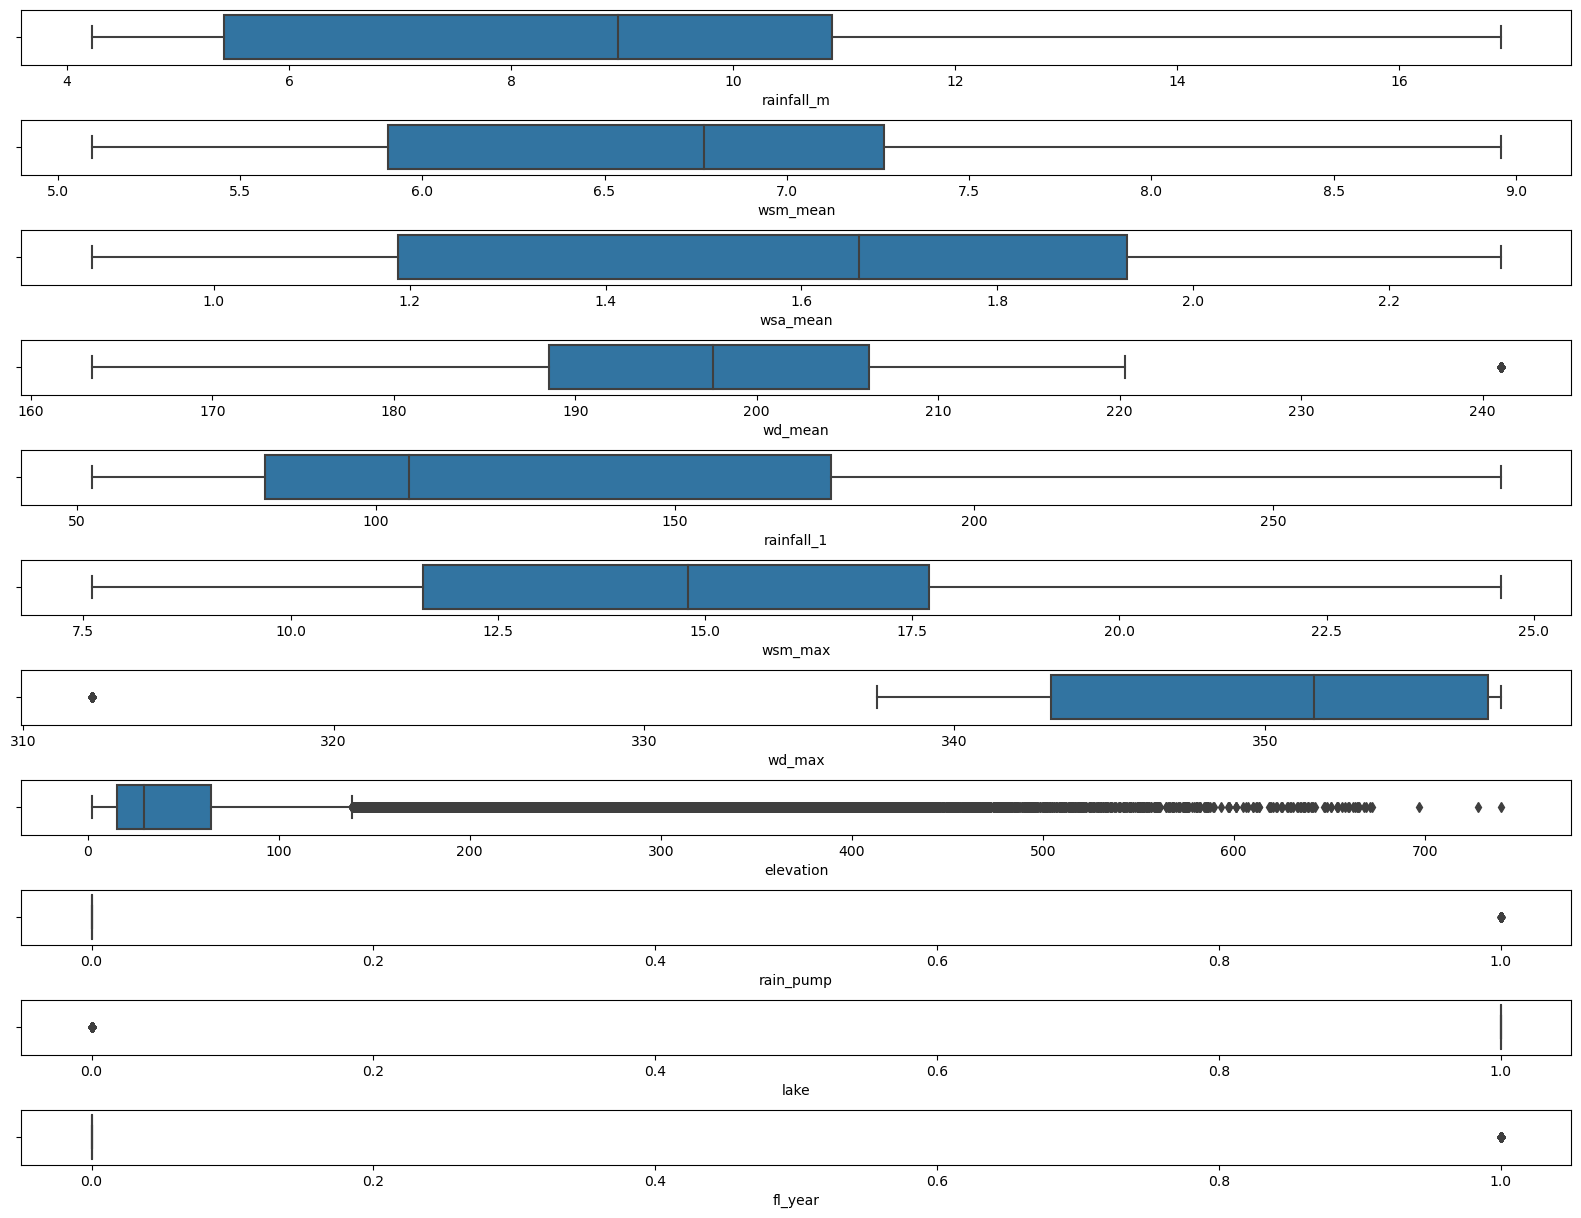

In [83]:
# 이상치 확인 - Box Plot
# 이상치 제거를 위해 box plot을 먼저 작성. 카테고리형 변수말고 "연속형 변수"에 대해서 진행
numerical_data = exx[['rainfall_m', 'wsm_mean', 'wsa_mean', 'wd_mean', 'rainfall_1', 'wsm_max', 'wd_max', 'elevation', 'rain_pump','lake', 'fl_year']]
fig, axes = plt.subplots(nrows = 11, figsize = (20,15))
fig.subplots_adjust(hspace=1)

for i,col in enumerate(numerical_data):
    plt.sca(axes[i])
    #axes[i].set(title = str(col))
    sns.boxplot(data = numerical_data, x = str(col))

In [86]:
# 이상치 처리 (Q3 - Q1)

from collections import Counter 

def detect_outliers(exx, n, features):
    outlier_indices = []
    for col in features:
        Q1 = np.percentile(exx[col], 25)
        Q3 = np.percentile(exx[col], 75)
        IQR = Q3 - Q1
        
        outlier_step = 1.5 * IQR
        
        outlier_list_col = exx[(exx[col] < Q1 - outlier_step) | (exx[col] > Q3 + outlier_step)].index
        outlier_indices.extend(outlier_list_col) # 원소 추가
    outlier_indices = Counter(outlier_indices) # 각 원소 갯수 딕션너리 형태로 반환
    multiple_outliers = list(k for k, v in outlier_indices.items() if v > n)

    return multiple_outliers

In [87]:
Outliers_to_drop = detect_outliers(exx, 2, ['rainfall_m', 'wsm_mean', 'wsa_mean', 'wd_mean', 'rainfall_1', 'wsm_max', 'wd_max', 'elevation', 'rain_pump', 'lake'])

In [91]:
exx.shape

(75973, 15)

In [92]:
#이상치 drop 실행!

exx = exx.drop(Outliers_to_drop, axis = 0).reset_index(drop = True)
exx.shape

(75786, 15)

In [97]:
'''
아직 처리 안한부분!

rainfall_m와 rainfall_l 높은 상관계수 -> 다중 공선성 문제 가능성 -> 둘 중 하나 제거
wsm_mean & wsa_mean 높은 상관계수 -> 다중 공선성 문제 가능성 -> 둘 중 하나 제거
wsm_max & wsm_mean 높은 상관계수 -> 다중 공선성 문제 가능성 -> 둘 중 하나 제거
'''
exx.to_file("f_data", encoding ='utf-8')

In [93]:
# 왜도, 첨도 확인
for col in numerical_data:
    print(col)
    print("Skewness: %f" % exx[str(col)].skew()) # 왜도
    print("Kurtosis: %f" % exx[str(col)].kurt()) # 첨도

rainfall_m
Skewness: 0.590900
Kurtosis: -0.606994
wsm_mean
Skewness: 0.402646
Kurtosis: -0.732574
wsa_mean
Skewness: -0.116524
Kurtosis: -1.057038
wd_mean
Skewness: 0.284319
Kurtosis: 1.070804
rainfall_1
Skewness: 0.781059
Kurtosis: 0.047087
wsm_max
Skewness: 0.412752
Kurtosis: -0.559481
wd_max
Skewness: -1.965249
Kurtosis: 5.802209
elevation
Skewness: 2.968435
Kurtosis: 10.276989
rain_pump
Skewness: 25.839901
Kurtosis: 665.718059
lake
Skewness: -1.701545
Kurtosis: 0.895279
fl_year
Skewness: 13.621126
Kurtosis: 183.539909


/Users/hope/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/hope/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/hope/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexib

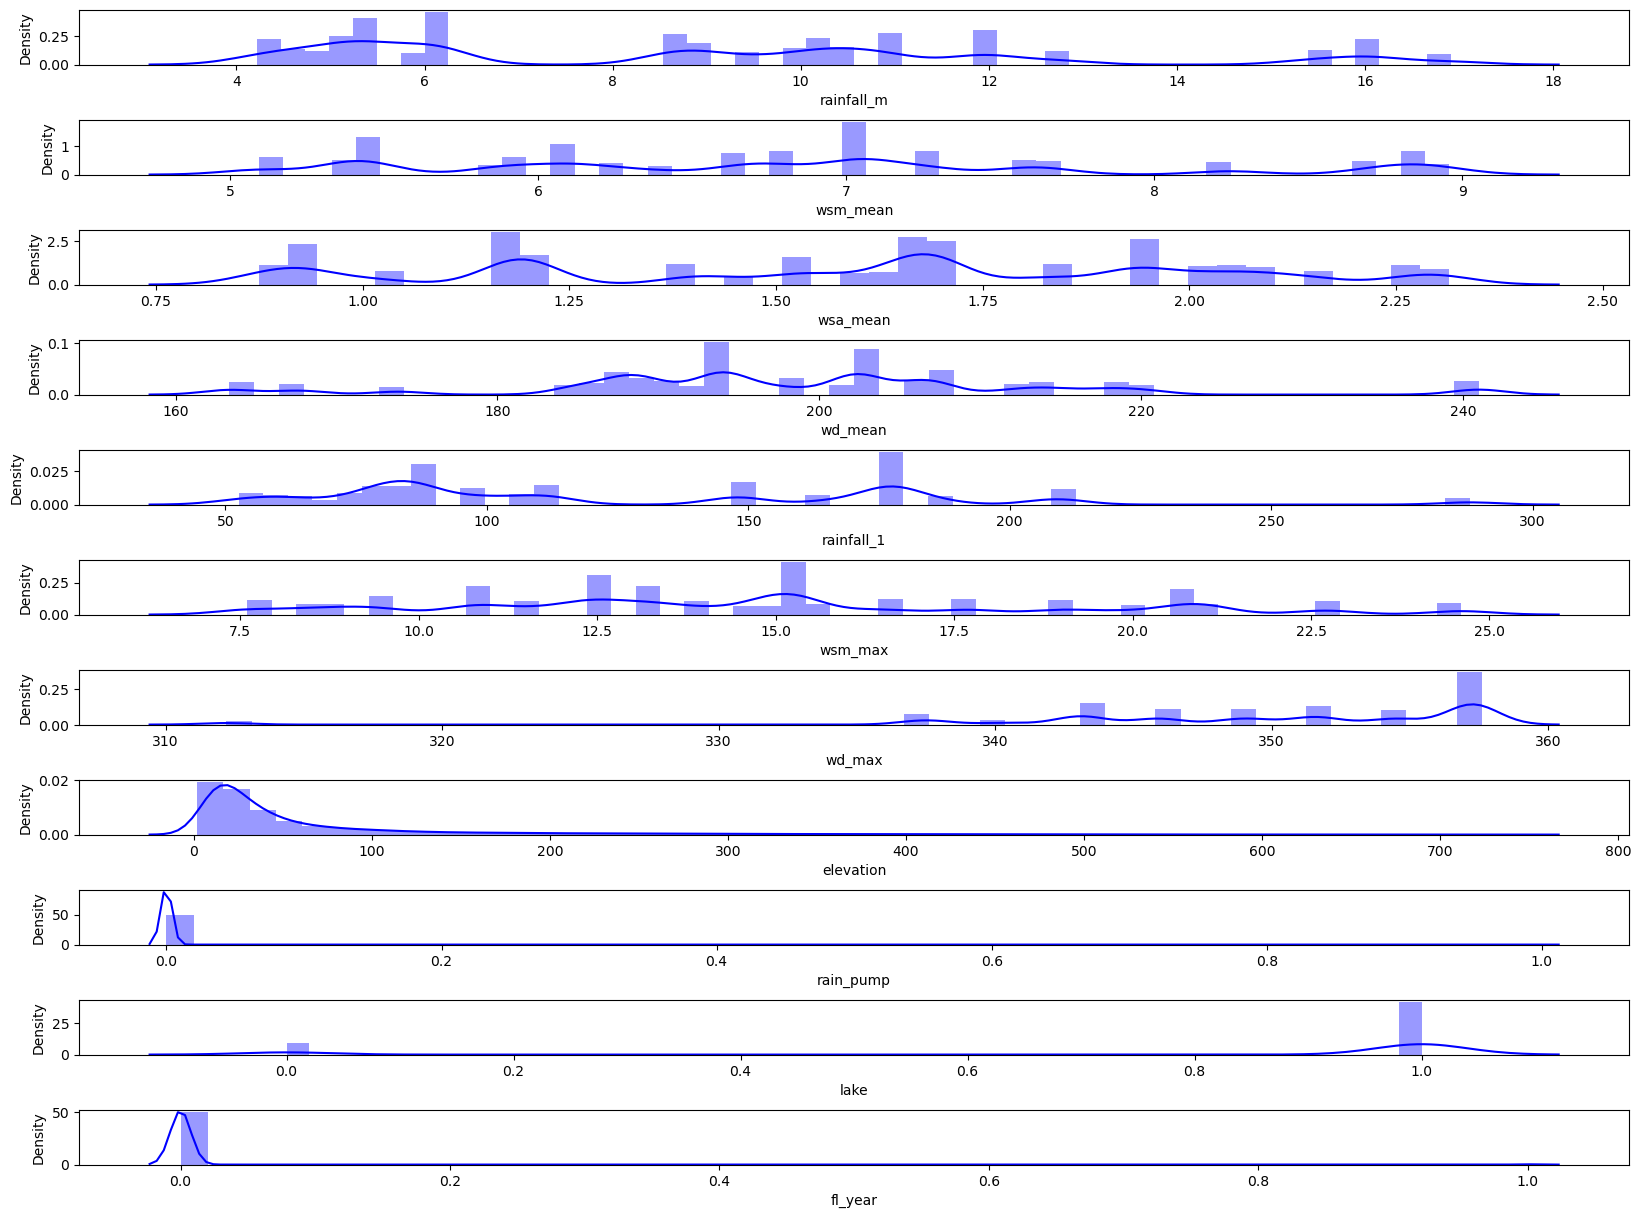

In [95]:
fig, axes = plt.subplots(nrows = 11, figsize = (20,15))
fig.subplots_adjust(hspace=1)

for i,col in enumerate(numerical_data):
    plt.sca(axes[i])
    #axes[i].set(title = str(col))
    sns.distplot(exx[str(col)], 
                 color = "b", 
                 label="Skewness: {:2f}".format(exx[str(col)].skew()))

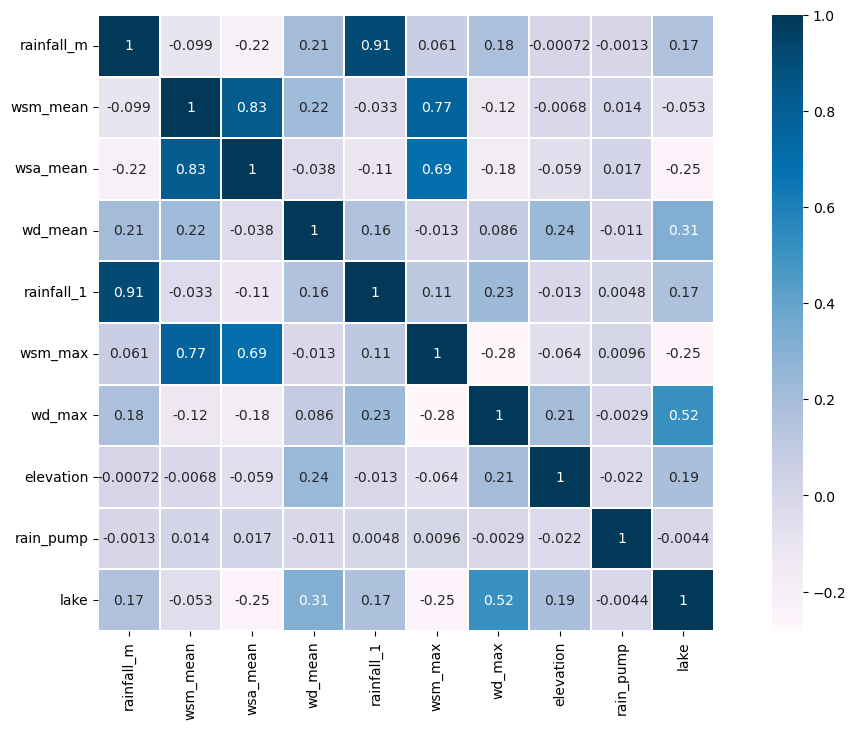

In [96]:
# 변수끼리의 상관관계
colormap = plt.cm.PuBu
sns.heatmap(numerical_data.corr() # 상관계수
            , linewidths = 0.1
            , square = True
            , annot = True
            , cmap = colormap)

plt.gcf().set_size_inches(15, 8) 

In [ ]:
'''
시각화 예시
# year 별 강수량 평균
sns.barplot(data = exx, x = 'date', y = 'rainfall_m')

# 서울시 구별 강수량 평균 -> 이건 지도가 낫겠네요!
sns.barplot(data = exx, x = 'city_name', y = 'rainfall_m')
'''